In [5]:
from tools import save_frames_as_gif
from metaworld.policies.sawyer_door_open_v2_policy import SawyerDoorOpenV2Policy

MovieWriter imagemagick unavailable; using Pillow instead.


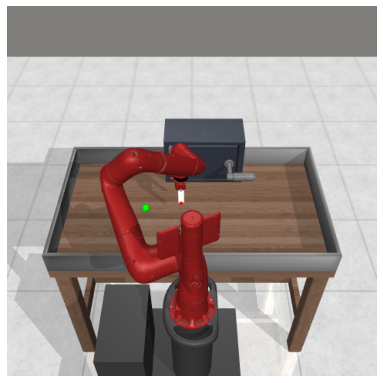

In [2]:
from metaworld.envs import (ALL_V2_ENVIRONMENTS_GOAL_OBSERVABLE,
                            ALL_V2_ENVIRONMENTS_GOAL_HIDDEN)
                            # these are ordered dicts where the key : value
                            # is env_name : env_constructor

import numpy as np

door_open_goal_observable_cls = ALL_V2_ENVIRONMENTS_GOAL_OBSERVABLE["door-open-v2-goal-observable"]
door_open_goal_hidden_cls = ALL_V2_ENVIRONMENTS_GOAL_HIDDEN["door-open-v2-goal-hidden"]

env = door_open_goal_hidden_cls()
env.render_mode = "rgb_array"
env.reset()  # Reset environment
frame = []
for i in range(100):
    a = env.action_space.sample()  # Sample an action
    obs, reward, Terminated, Truncated, info = env.step(a)  # Step the environment with the sampled random action
    frame.append(env.render())


assert (obs[-3:] == np.zeros(3)).all() # goal will be zeroed out because env is HiddenGoal

# You can choose to initialize the random seed of the environment.
# The state of your rng will remain unaffected after the environment is constructed.
env1 = door_open_goal_observable_cls(seed=5)
env2 = door_open_goal_observable_cls(seed=5)

env1.reset()  # Reset environment
env2.reset()
a1 = env1.action_space.sample()  # Sample an action
a2 = env2.action_space.sample()
next_obs1, _, _, _, _ = env1.step(a1)  # Step the environment with the sampled random action

next_obs2, _,_, _, _ = env2.step(a2)
assert (next_obs1[-3:] == next_obs2[-3:]).all() # 2 envs initialized with the same seed will have the same goal
assert not (next_obs2[-3:] == np.zeros(3)).all()   # The env's are goal observable, meaning the goal is not zero'd out

env3 = door_open_goal_observable_cls(seed=10)  # Construct an environment with a different seed
env1.reset()  # Reset environment
env3.reset()
a1 = env1.action_space.sample()  # Sample an action
a3 = env3.action_space.sample()
next_obs1, _,_, _, _ = env1.step(a1)  # Step the environment with the sampled random action
next_obs3, _,_, _, _ = env3.step(a3)

assert not (next_obs1[-3:] == next_obs3[-3:]).all() # 2 envs initialized with different seeds will have different goals
assert not (next_obs1[-3:] == np.zeros(3)).all()   # The env's are goal observable, meaning the goal is not zero'd out

save_frames_as_gif(frame, './experiments', 'metaworld_test.gif', fps=10)

In [3]:
print(env.observation_space)

Box([-0.525   0.348  -0.0525 -1.        -inf    -inf    -inf    -inf    -inf
    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf
 -0.525   0.348  -0.0525 -1.        -inf    -inf    -inf    -inf    -inf
    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf
  0.      0.      0.    ], [0.525 1.025 0.7   1.      inf   inf   inf   inf   inf   inf   inf   inf
   inf   inf   inf   inf   inf   inf 0.525 1.025 0.7   1.      inf   inf
   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf
 0.    0.    0.   ], (39,), float64)


In [4]:
env.action_space

Box(-1.0, 1.0, (4,), float64)

In [6]:
done = False
plc = SawyerDoorOpenV2Policy()

MovieWriter imagemagick unavailable; using Pillow instead.


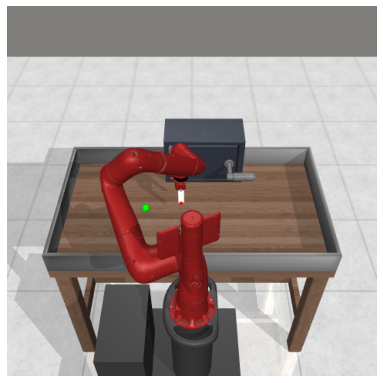

In [9]:
obs, info = env.reset()
frames = [env.render()]
for _ in range(env.max_path_length):
    action = plc.get_action(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break
    frames.append(env.render())

env.close()
save_frames_as_gif(frames, './experiments', 'metaworld_door_open_policy.gif', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.


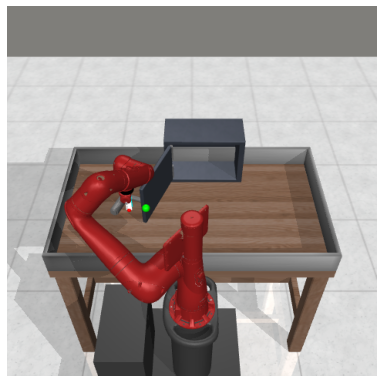

In [10]:
save_frames_as_gif(frames, './experiments', 'metaworld_door_open_policy.gif', fps=10)